In [1]:
import sqlite3
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the same database
conn = sqlite3.connect("alpha_testing.db")
cursor = conn.cursor()

# Create session_logs table
cursor.execute("""
CREATE TABLE IF NOT EXISTS session_logs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    tester_name TEXT,
    feature TEXT,
    duration_minutes REAL,
    date_played DATE
)
""")
conn.commit()
print("Session logs table ready.")


Session logs table ready.


In [2]:
def log_session(tester_name, feature, duration):
    today = date.today()
    cursor.execute("""
    INSERT INTO session_logs (tester_name, feature, duration_minutes, date_played)
    VALUES (?, ?, ?, ?)
    """, (tester_name, feature, duration, today))
    conn.commit()
    print(f"Session logged: {tester_name} - {feature} ({duration} min)")

# Example usage
log_session("Alice", "Guided Meditation", 10)
log_session("Bob", "Breathing Exercise", 5)


Session logged: Alice - Guided Meditation (10 min)
Session logged: Bob - Breathing Exercise (5 min)


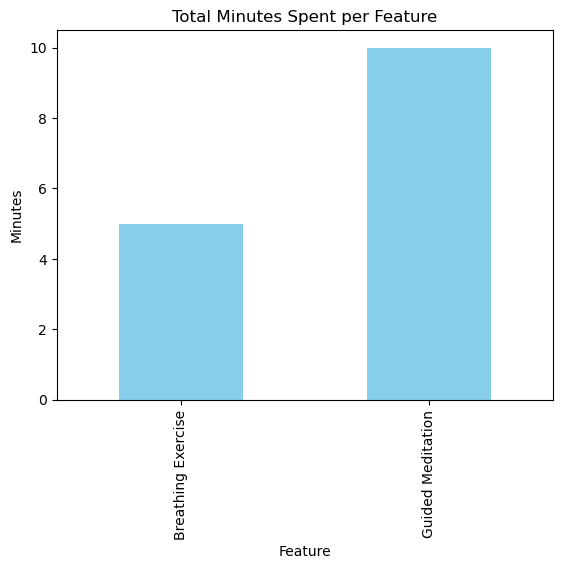

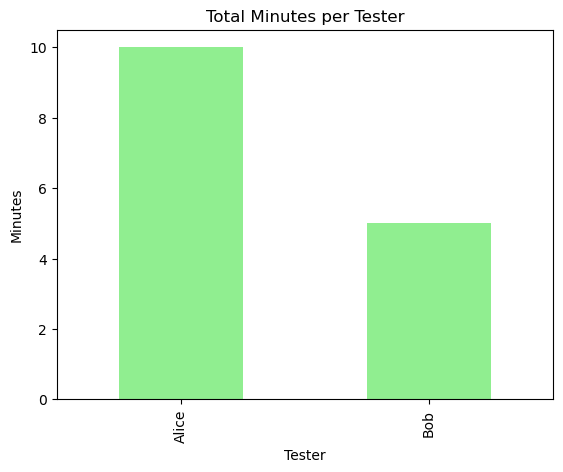

In [3]:
# Load session logs into pandas
df_sessions = pd.read_sql_query("SELECT * FROM session_logs", conn)

# Plot total minutes per feature
feature_usage = df_sessions.groupby("feature")["duration_minutes"].sum()
feature_usage.plot(kind="bar", color="skyblue")
plt.title("Total Minutes Spent per Feature")
plt.ylabel("Minutes")
plt.xlabel("Feature")
plt.show()

# Sessions per tester
tester_usage = df_sessions.groupby("tester_name")["duration_minutes"].sum()
tester_usage.plot(kind="bar", color="lightgreen")
plt.title("Total Minutes per Tester")
plt.ylabel("Minutes")
plt.xlabel("Tester")
plt.show()
